<a href="https://colab.research.google.com/github/Devesh946/AI_df20555/blob/main/ce802/ce802_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors, datasets

In [9]:
df=pd.read_csv('/content/CE802_P2_Data.csv')
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,NaN,False
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,NaN,True
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,-6.67,False
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,NaN,False
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,15.87,0.74,18,-5.58,2,20.52,-0.64,104.86,1.77,10.86,-27.20,-25.32,1.68,-163.14,NaN,True
1496,17.19,2.61,39,-3.56,2,21.40,0.92,116.86,0.18,10.04,-24.74,-23.32,1.29,-229.14,NaN,False
1497,12.69,2.14,30,-3.36,2,21.30,2.40,74.86,0.37,9.95,-25.02,-23.32,1.35,-268.14,NaN,True
1498,6.63,-0.75,855,4.86,20,33.66,-9.50,182.86,14.00,7.78,-22.52,-46.32,16.80,70.86,-6.22,False


In [10]:
df = df.drop(columns='F15')
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,False
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,True
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,False
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,False
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,15.87,0.74,18,-5.58,2,20.52,-0.64,104.86,1.77,10.86,-27.20,-25.32,1.68,-163.14,True
1496,17.19,2.61,39,-3.56,2,21.40,0.92,116.86,0.18,10.04,-24.74,-23.32,1.29,-229.14,False
1497,12.69,2.14,30,-3.36,2,21.30,2.40,74.86,0.37,9.95,-25.02,-23.32,1.35,-268.14,True
1498,6.63,-0.75,855,4.86,20,33.66,-9.50,182.86,14.00,7.78,-22.52,-46.32,16.80,70.86,False


Now applying label encoder for computational simplicity class true as 1 and false as 0





In [11]:
df[["Class"]] = df[["Class"]].apply(LabelEncoder().fit_transform)
df.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,0
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,1
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,0
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,0
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,1


In [12]:
n_test = 300  # as we always divide traing and test set into 5 parts of which 4 are used for training and 1 for testing
features = ["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10","F11", "F12","F13", "F14"]
print(df[features].head(5))

      F1    F2    F3    F4  F5     F6  ...    F9    F10    F11    F12    F13     F14
0  16.77  1.25  1080  4.04  20  30.36  ...  9.00   7.74 -15.70 -36.32  26.10 -184.14
1  12.45  1.63   156 -6.98   2  21.52  ...  0.43  10.11 -25.06 -23.32   2.55 -208.14
2   0.06  1.09   855  6.08  20  33.76  ...  9.15   6.01 -14.40 -36.32  26.25 -394.14
3   1.80  2.04   435  1.72  20  31.96  ...  5.35   6.15 -17.64 -36.32  17.25  -64.14
4  15.45  1.38   195 -8.70   2  21.10  ...  1.37  10.26 -27.50 -23.32   2.01 -250.14

[5 rows x 14 columns]


In [13]:
outcomes = ["Class"]
print(df[outcomes].head(5))

   Class
0      0
1      1
2      0
3      0
4      1


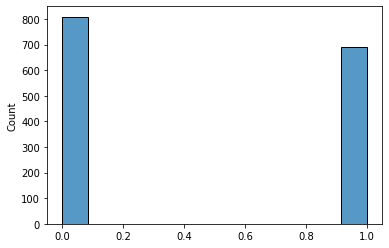

In [14]:
X_df = df[features].copy()
y_df = df[outcomes].copy()
X = X_df.values
y = y_df.values.T[0]
y = (y - y.min())/(y.max() - y.min()) 
sns_plot = sns.histplot(y, kde=False) # lets look how many are true and false.

### Training

In [16]:
n_test = 300

estimator = DecisionTreeRegressor()

X_train, y_train = X[:-n_test], y[:-n_test]
X_test, y_test = X[-n_test:], y[-n_test:]
    
estimator.fit(X_train, y_train)
y_predict = estimator.predict(X_test)

In [17]:
X_test

array([[ 1.2840e+01,  8.2000e-01,  1.2300e+02, ..., -2.3320e+01,
         2.1000e-01, -1.8414e+02],
       [ 9.3000e-01,  2.0800e+00,  1.8000e+02, ..., -2.6320e+01,
         2.2350e+01, -4.0914e+02],
       [ 1.2390e+01,  2.0300e+00,  5.1000e+01, ..., -2.3320e+01,
         1.6200e+00, -1.7814e+02],
       ...,
       [ 1.2690e+01,  2.1400e+00,  3.0000e+01, ..., -2.3320e+01,
         1.3500e+00, -2.6814e+02],
       [ 6.6300e+00, -7.5000e-01,  8.5500e+02, ..., -4.6320e+01,
         1.6800e+01,  7.0860e+01],
       [ 1.7100e+00,  4.7000e-01,  2.2500e+02, ..., -3.6320e+01,
         2.5650e+01, -4.2414e+02]])

In [18]:
y_predict

array([0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1.

In [19]:
error = np.nanmean((y_test - y_predict) **2, axis=0)   #mean square error
print('Error of Decision tres classifier is ',error) 
accuracy = 1-error
print('Accuracy of Decision tres classifier is ',accuracy)

Error of Decision tres classifier is  0.19333333333333333
Accuracy of Decision tres classifier is  0.8066666666666666


Although the accuracy is approximetly 80 percent which is greater than the random guess with accuracy 50 percent lets see if we can find something better. Lets  try k means clustering.

In [67]:
kmeans = KMeans(n_clusters=2,  random_state=1).fit(X)
y_means = kmeans.labels_
k_error = np.nanmean((y - y_means) **2, axis=0)
print('Error of k means cluster is ',k_error) 
k_accuracy = 1-k_error
print('Accuracy of Decision tres classifier is ',k_accuracy)

Error of k means cluster is  0.464
Accuracy of Decision tres classifier is  0.536


In [73]:
# As the error is so large we can use min max scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kmeans=KMeans(n_clusters=2,  random_state=2).fit(X_scaled)
y_means = kmeans.labels_
k_error = np.nanmean((y - y_means) **2, axis=0)
print('Error of k means cluster is ',k_error)
k_accuracy = 1-k_error
print('Accuracy of Decision tres classifier is ',k_accuracy)

Error of k means cluster is  0.402
Accuracy of Decision tres classifier is  0.598


Now lets try k-NN k nearest neighbour classifier

In [80]:

knn_clf = neighbors.KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train, y_train)
y_predict = knn_clf.predict(X_test)
error = np.nanmean((y_test - y_predict) **2, axis=0)   #mean square error
print('Error of Decision tres classifier is ',error) 
accuracy = 1-error
print('Accuracy of Decision tres classifier is ',accuracy)

Error of Decision tres classifier is  0.41333333333333333
Accuracy of Decision tres classifier is  0.5866666666666667


As we can see the training data on which we performed classification of weather the customer buys fewer expensive products or not.
The decision tree classifier works best with accuracy of 80 percent so we are going to implement it on test data.

### Testing

In [81]:
df2=pd.read_csv('/content/CE802_P2_Test.csv')
df2

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,3.54,0.45,600,2.16,20,33.86,-4.16,207.86,8.30,6.64,-17.68,-36.32,16.80,-49.14,-6.81,NaN
1,12.96,4.50,6,-5.42,2,21.22,-0.66,115.86,1.95,10.19,-24.32,-21.32,0.06,-229.14,-7.10,NaN
2,13.02,2.74,81,-7.08,2,21.28,1.40,111.86,2.05,11.30,-34.98,-21.32,0.42,-217.14,-7.05,NaN
3,14.91,1.00,162,-8.30,2,21.12,-0.42,85.86,0.96,10.16,-24.68,-25.32,0.42,-202.14,NaN,NaN
4,2.61,1.46,1020,4.66,20,30.66,-0.46,122.86,7.20,7.04,-16.86,-26.32,20.25,-289.14,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.93,1.34,72,-5.20,2,21.64,0.44,116.86,0.55,10.18,-26.50,-21.32,1.98,-232.14,-8.14,NaN
1496,0.63,-0.51,225,5.38,20,31.26,-9.40,77.86,9.80,6.26,-15.06,-36.32,22.35,-244.14,-8.32,NaN
1497,14.25,0.58,3,-3.74,2,21.28,0.78,78.86,0.33,10.96,-27.64,-25.32,0.75,-190.14,NaN,NaN
1498,3.45,3.95,390,1.74,20,31.16,-7.84,302.86,7.80,6.58,-19.38,-46.32,22.35,-19.14,-7.67,NaN


As we never intent to use column 15 we will not drop it but we not include it in X. 

In [83]:
features = ["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10","F11", "F12","F13", "F14"] #we dropped F15
outcomes = ["Class"]
X_df2 = df2[features].copy()
y_df2 = df2[outcomes].copy()
X = X_df2.values
y = y_df2.values.T[0]
X_test, y_test = X[:], y[:]
y_predict = estimator.predict(X_test)

In [87]:
df2[outcomes] = y_predict
df2

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,3.54,0.45,600,2.16,20,33.86,-4.16,207.86,8.30,6.64,-17.68,-36.32,16.80,-49.14,-6.81,1.0
1,12.96,4.50,6,-5.42,2,21.22,-0.66,115.86,1.95,10.19,-24.32,-21.32,0.06,-229.14,-7.10,0.0
2,13.02,2.74,81,-7.08,2,21.28,1.40,111.86,2.05,11.30,-34.98,-21.32,0.42,-217.14,-7.05,1.0
3,14.91,1.00,162,-8.30,2,21.12,-0.42,85.86,0.96,10.16,-24.68,-25.32,0.42,-202.14,NaN,0.0
4,2.61,1.46,1020,4.66,20,30.66,-0.46,122.86,7.20,7.04,-16.86,-26.32,20.25,-289.14,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.93,1.34,72,-5.20,2,21.64,0.44,116.86,0.55,10.18,-26.50,-21.32,1.98,-232.14,-8.14,1.0
1496,0.63,-0.51,225,5.38,20,31.26,-9.40,77.86,9.80,6.26,-15.06,-36.32,22.35,-244.14,-8.32,1.0
1497,14.25,0.58,3,-3.74,2,21.28,0.78,78.86,0.33,10.96,-27.64,-25.32,0.75,-190.14,NaN,1.0
1498,3.45,3.95,390,1.74,20,31.16,-7.84,302.86,7.80,6.58,-19.38,-46.32,22.35,-19.14,-7.67,0.0


In [104]:
# replacing NAN value with mean value
f15 = df2["F15"].copy()
f15_mean = np.mean(f15)
f15_mean

-7.7763466666666705

In [108]:
df2 = df2.replace(np.NaN,-7.78) # replacing -7.78 (mean) with Nan
df2

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,3.54,0.45,600,2.16,20,33.86,-4.16,207.86,8.30,6.64,-17.68,-36.32,16.80,-49.14,-6.81,1.0
1,12.96,4.50,6,-5.42,2,21.22,-0.66,115.86,1.95,10.19,-24.32,-21.32,0.06,-229.14,-7.10,0.0
2,13.02,2.74,81,-7.08,2,21.28,1.40,111.86,2.05,11.30,-34.98,-21.32,0.42,-217.14,-7.05,1.0
3,14.91,1.00,162,-8.30,2,21.12,-0.42,85.86,0.96,10.16,-24.68,-25.32,0.42,-202.14,-7.78,0.0
4,2.61,1.46,1020,4.66,20,30.66,-0.46,122.86,7.20,7.04,-16.86,-26.32,20.25,-289.14,-7.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.93,1.34,72,-5.20,2,21.64,0.44,116.86,0.55,10.18,-26.50,-21.32,1.98,-232.14,-8.14,1.0
1496,0.63,-0.51,225,5.38,20,31.26,-9.40,77.86,9.80,6.26,-15.06,-36.32,22.35,-244.14,-8.32,1.0
1497,14.25,0.58,3,-3.74,2,21.28,0.78,78.86,0.33,10.96,-27.64,-25.32,0.75,-190.14,-7.78,1.0
1498,3.45,3.95,390,1.74,20,31.16,-7.84,302.86,7.80,6.58,-19.38,-46.32,22.35,-19.14,-7.67,0.0


In [119]:
df2[["Class"]] = df2[["Class"]].replace(1,True)
df2[["Class"]] = df2[["Class"]].replace(0,False)
df2

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,3.54,0.45,600,2.16,20,33.86,-4.16,207.86,8.30,6.64,-17.68,-36.32,16.80,-49.14,-6.81,True
1,12.96,4.50,6,-5.42,2,21.22,-0.66,115.86,1.95,10.19,-24.32,-21.32,0.06,-229.14,-7.10,False
2,13.02,2.74,81,-7.08,2,21.28,1.40,111.86,2.05,11.30,-34.98,-21.32,0.42,-217.14,-7.05,True
3,14.91,1.00,162,-8.30,2,21.12,-0.42,85.86,0.96,10.16,-24.68,-25.32,0.42,-202.14,-7.78,False
4,2.61,1.46,1020,4.66,20,30.66,-0.46,122.86,7.20,7.04,-16.86,-26.32,20.25,-289.14,-7.78,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.93,1.34,72,-5.20,2,21.64,0.44,116.86,0.55,10.18,-26.50,-21.32,1.98,-232.14,-8.14,True
1496,0.63,-0.51,225,5.38,20,31.26,-9.40,77.86,9.80,6.26,-15.06,-36.32,22.35,-244.14,-8.32,True
1497,14.25,0.58,3,-3.74,2,21.28,0.78,78.86,0.33,10.96,-27.64,-25.32,0.75,-190.14,-7.78,True
1498,3.45,3.95,390,1.74,20,31.16,-7.84,302.86,7.80,6.58,-19.38,-46.32,22.35,-19.14,-7.67,False


In [123]:
df2.to_csv (r'/content/CE802_P2_Data.csv', index = False, header=True)